**INTELIGÊNCIA ARTIFICIAL E COMPUTACIONAL**

Prof. Miguel Bozer da Silva - profmiguel.silva@fiap.com.br

## Clustering

In [ ]:
# Importando as bibliotecas para os modelos
import pandas as pd

from google_drive_downloader import GoogleDriveDownloader as gdd

# Plot dos gráficos
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import colors
import seaborn as sns

## Tarefa #1: Recebendo os dados

In [ ]:
data_google_id = '12Hm7WiRG46BRCRgq4B_daWTkx8jVQpQZ'
gdd.download_file_from_google_drive(file_id=data_google_id, 
                                    dest_path = './Mall.csv', 
                                    showsize = True)
dados = pd.read_csv("Mall.csv", sep=',')

0.0 B Done.


## Tarefa #2: Analisando os dados

## Tarefa #3: Criando os agrupamentos

Vamos criar agrupamentos com diferentes metodologias:

### K-MEANS

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
# plotando os dados identificando com os seus clusters
plt.scatter(dados[['Annual Income (k$)']],dados[['Spending Score (1-100)']], c=kmeans_labels, alpha=0.5, cmap='rainbow', )
plt.xlabel('Salario Anual')
plt.ylabel('Pontuação de gastos')
# plotando os centroides
plt.scatter(centroides[:, 0], centroides[:, 1], c='black', marker='X', s=200, alpha=0.5)
plt.rcParams['figure.figsize'] = (15, 10)
plt.show()

Escolhendo a quantidade de grupos usando o método do "cotovelo":

In [ ]:
# Lista com a quantidade de clusters que iremos testar
k = list(range(1, 10))

In [ ]:
k

[1, 2, 3, 4, 5, 6, 7, 8, 9]

In [ ]:
# Armazena o SSE (soma dos erros quadraticos) para cada quantidade de k
sse = []

# Roda o K-means para cada k fornecido
for i in k:
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(dados[['Annual Income (k$)','Spending Score (1-100)']])
    sse.append(kmeans.inertia_)

plt.rcParams['figure.figsize'] = (10, 5)
# Plota o gráfico com a soma dos erros quadraticos
plt.plot(k, sse, '-o')
plt.xlabel(r'Número de clusters')
plt.ylabel('Inércia')
plt.show()

Podemos notar que após 3 ou 5 clusters a soma do erro quadratico tem uma redução na forma com a qual a função está decrescendo. Assim podemos adotar 5 clusters. Checando os resultados para 5 clusters:

In [ ]:
# plotando os dados identificando com os seus clusters
plt.scatter(dados[['Annual Income (k$)']],dados[['Spending Score (1-100)']], c=kmeans_labels, alpha=0.5, cmap='rainbow')
plt.xlabel('Salario Anual')
plt.ylabel('Pontuação de gastos')
# plotando os centroides
plt.scatter(centroides[:, 0], centroides[:, 1], c='black', marker='X', s=200, alpha=0.5)
plt.rcParams['figure.figsize'] = (15, 10)
plt.show()

### Agrupamento Hierarquico

In [ ]:
# Com Scikit Learn
from sklearn.cluster import AgglomerativeClustering

In [ ]:
# Criando o modelo
# linkage = ‘ward’ minimizes the variance of the clusters being merged.
model = AgglomerativeClustering(n_clusters=5,linkage='ward')

model.fit(dados[['Annual Income (k$)','Spending Score (1-100)']])
hierarquico_labels = model.labels_
hierarquico_labels

In [ ]:
# plotando os dados identificando com os seus clusters
plt.scatter(dados[['Annual Income (k$)']],dados[['Spending Score (1-100)']], c=hierarquico_labels, alpha=0.5, cmap='rainbow')
plt.xlabel('Salario Anual')
plt.ylabel('Pontuação de gastos')
# plotando os centroides

plt.rcParams['figure.figsize'] = (15, 10)
plt.show()

Visualizando o dendrograma

In [ ]:
import scipy.cluster.hierarchy as sch

dendrogram = sch.dendrogram(sch.linkage(dados[['Annual Income (k$)','Spending Score (1-100)']], method = 'ward'))
plt.title('Dendrogam', fontsize = 20)
plt.xlabel('Clientes')
plt.ylabel('Distância Euclidiana')
plt.show()

### DBSCAN

Vamos agora utilizar o DBSCAN para gerar os agrupamentos

In [1]:
from sklearn.cluster import DBSCAN

Labels com -1 foram classificados como outliers

In [ ]:
#Plotando o grafico:
plt.scatter(dados[['Annual Income (k$)']],dados[['Spending Score (1-100)']], c=dbscan_labels, alpha=0.5, cmap='rainbow')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

In [ ]:
#Plotando o grafico sem os outliers:
#mascara para outlier
mascara = dbscan_labels>=0

#plotando o gráfico
plt.scatter(dados[['Annual Income (k$)']][mascara],dados[['Spending Score (1-100)']][mascara], c=dbscan_labels[mascara], alpha=0.5, cmap='rainbow')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()


Checando a quantidade de valores que foram classificados como Outliers:

In [ ]:
list(mascara).count(False)

# Tarefa #4: Avaliando as Métricas

- Vamos começar avaliando a métrica de Adjusted Rand index:

In [ ]:
from sklearn.metrics import adjusted_rand_score, silhouette_score

Comparação entre K-Means e Agrupamento Hierarquico:

Comparação entre K-Means e DBSCAN:

Comparação entre Agrupamento Hierarquico e o DBSCAN:

Percebemos que o KMeans e o Agrupamento hierarquico para esse caso conseguiram resultados mais próximos um do outro do que quando comparados com o DBSCAN

- Vamos começar avaliando a métrica de Silhouette:

KMEANS:

Agrupamento Hierarquico:

DBSCAN:

# Extra: Agrupamento com dados de maiores dimensões

Os agrupamentos podem ser realizados não apenas com dados de duas dimensões, mas também para dados de maiores dimensões. Vamos ver a seguir um exemplo disso;

In [ ]:
x = dados[['Age', 'Spending Score (1-100)', 'Annual Income (k$)']].values

# Definindo o modelo de clusterizacao. K-MEANS com 5 clusters
kmeans = KMeans(n_clusters=5, random_state = 0)

#Implementando o K-Means nos dados:
kmeans.fit(x)

#Salvando os labels dos clusters para cada exemplo
kmeans_y = kmeans.predict(dados.drop(columns=['Gender','CustomerID']))

Plotando o gráfico:

In [ ]:
from mpl_toolkits import mplot3d

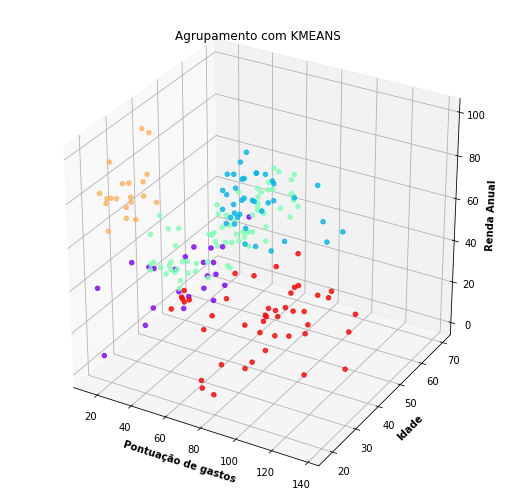

In [ ]:
x = dados[['Annual Income (k$)']]
y = dados[['Age']]
z = dados[['Spending Score (1-100)']]


# Creating figure
fig = plt.figure(figsize = (9, 9))
ax = plt.axes(projection ="3d")
# Creating plot

sctt = ax.scatter3D(x, y, z,
                    alpha = 0.8,
                    c = kmeans_y,
                    cmap='rainbow',
                    )

plt.title("Agrupamento com KMEANS")
ax.set_xlabel('Pontuação de gastos', fontweight ='bold')
ax.set_ylabel('Idade', fontweight ='bold')
ax.set_zlabel('Renda Anual', fontweight ='bold')

plt.show()

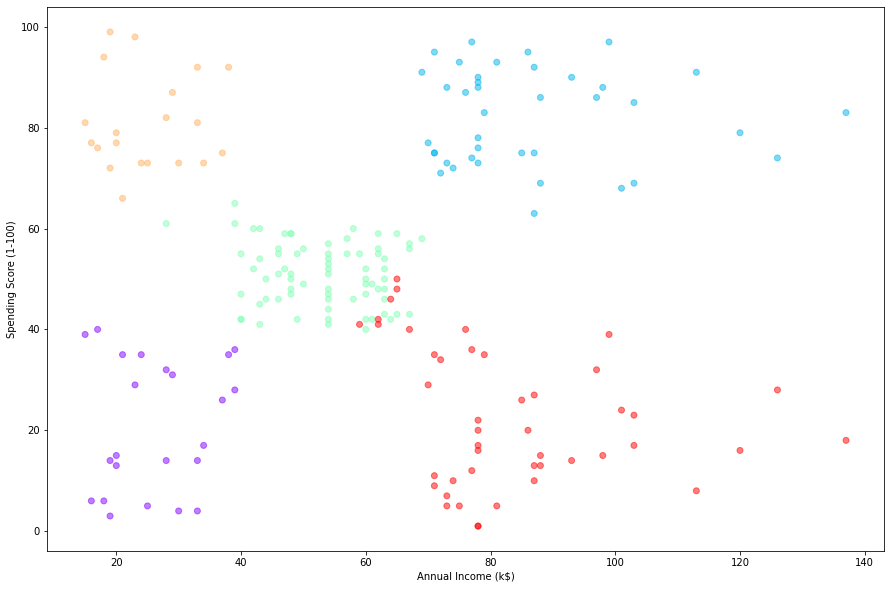

In [ ]:
#Plotando o grafico:
plt.scatter(dados[['Annual Income (k$)']],dados[['Spending Score (1-100)']], c=kmeans_y, alpha=0.5, cmap='rainbow', )
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

Obtendo a métrica de Silhouette:

In [ ]:
silhouette_score(dados.drop(columns=['Gender','CustomerID']),kmeans_y)

0.41797139778609976

# Exercício:

Faça um estudo de agrupamentos utilizando as colunas de Idade (Age) e a Pontuação de gastos (Spending Score (1-100)). Caso você seja o dono de uma loja nesse shopping, qual o nome você atribuiria a cada cluster? Qual cluster é o melhor para que você tente atrair para o seu estabelecimento?

# Correção Exercício:

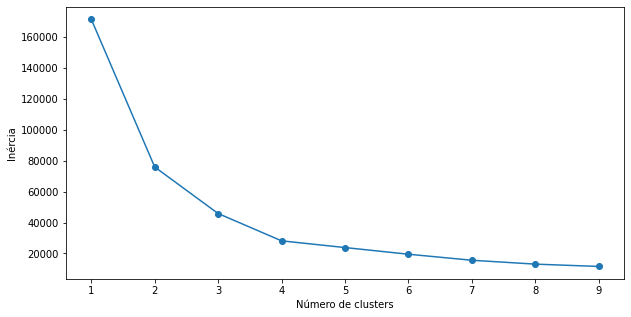

In [ ]:
# Armazena o SSE (soma dos erros quadraticos) para cada quantidade de k
sse = []

# Roda o K-means para cada k fornecido
for i in k:
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(dados[['Age', 'Spending Score (1-100)']])
    sse.append(kmeans.inertia_)

plt.rcParams['figure.figsize'] = (10, 5)
# Plota o gráfico com a soma dos erros quadraticos
plt.plot(k, sse, '-o')
plt.xlabel(r'Número de clusters')
plt.ylabel('Inércia')
plt.show()

Com o gráfico acima podemos definir 4 clusters.

In [ ]:
x = dados[['Age', 'Spending Score (1-100)']].values

# Definindo o modelo de clusterizacao. K-MEANS com 5 clusters
kmeans = KMeans(n_clusters=4, random_state = 0)

#Implementando o K-Means nos dados:
kmeans.fit(x)

#Salvando os centroides de cada cluster
centroides = kmeans.cluster_centers_

#Salvando os labels dos clusters para cada exemplo
kmeans_y = kmeans.predict(dados[['Age', 'Spending Score (1-100)']])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KMeans was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


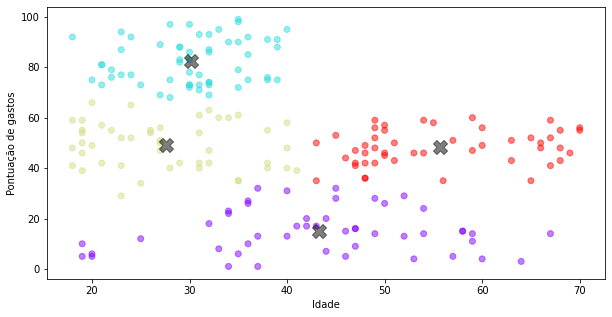

In [ ]:
# plotando os dados identificando com os seus clusters
plt.scatter(dados['Age'],dados['Spending Score (1-100)'], c=kmeans_y, alpha=0.5, cmap='rainbow')
plt.xlabel('Idade')
plt.ylabel('Pontuação de gastos')
# plotando os centroides
plt.scatter(centroides[:, 0], centroides[:, 1], c='black', marker='X', s=200, alpha=0.5)
plt.rcParams['figure.figsize'] = (15, 10)
plt.show()

Podemos ver que há um grupo de até aproximadamente 40 anos com uma pontuação entre 60 e 100 pontos. Esses são os clientes fiéis da loja.

Temos dois clusters intermediários, um na mesma faixa etária dos clientes fiéis da loja. Por estarem na mesma faixa etária dos clientes fiéis existe uma oportunidade de tentar atrair alguns desses clientes para conseguir mais clientes fiéis. Esse cluster poderíamos chamar de clientes potenciais I.

Outro com uma idade entre 40 e 70 anos também se encontra na faixa etária. Não se trata da principal faixa etária que a loja consegue de clientes fiéis. Como há uma grande quantidade de clientes nessa faixa etária e com uma boa pontuação, podemos chamá-los de clientes potenciais II.

Por o ultimo cluster tem apenas os valores baixos de pontuação dos clientes. Assim, esses seriam os clientes regulares.